In [1]:
import numpy as np
import matplotlib.pyplot
import cv2, os

In [2]:
# dirs
date = '0902'
ldr2hdr_dir = './ldr2hdr/2023%s'%date

# exposure time
ex_time = np.array([160, 270, 300, 340, 370])
ex_max = 370
exposure = ex_time / ex_max

In [3]:
# safe subtraction
def safe_subtract(a,b):
    difference = np.abs(a.astype(np.int16) - b.astype(np.int16))
    
    return difference.astype(a.dtype)

In [4]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt


def make_hdr(ldr_images, weight_trapezoid, exposure):
    ldr_images_filtered = [ndimage.median_filter(image, size=3) for image in ldr_images]
    
    weighted_images = [weight_trapezoid[image] for image in ldr_images_filtered]
    
    radiance_images = [np.multiply(weighted_images[i], ldr_images[i] / exposure[i]) for i in range(len(ldr_images_filtered))]
    weight_sum_image = np.sum(weighted_images, axis=0)
    radiance_sum_image = np.sum(radiance_images, axis=0)

    idx_invalid = (weight_sum_image == 0)
    weight_sum_image[idx_invalid] = 1
    radiance_sum_image[idx_invalid] = 0

    return np.divide(radiance_sum_image, weight_sum_image), idx_invalid, weight_sum_image


In [5]:
# assumes that we have the uint16 LDR images 

invalid_intensity_ratio = 0.004  # 0 < invalid_intensity_ratio: invalid,  out of 1

max_intenisty = 2**16
weight_trapezoid = np.zeros(max_intenisty)
intv = float(max_intenisty) * invalid_intensity_ratio

for i in range(max_intenisty):
    if i < intv:
        weight_trapezoid[i] = 0  
    elif i < intv * 2:
        weight_trapezoid[i] = (i - intv) / intv
    elif i < max_intenisty - (intv * 2):
        weight_trapezoid[i] = 1
    elif i < max_intenisty - intv:
        weight_trapezoid[i] = (max_intenisty - intv - i) / intv
    else:
        weight_trapezoid[i] = 0

In [6]:
weight_trapezoid.mean()

0.987999995239079

In [7]:
os.path.join(ldr2hdr_dir, '%s_step_5_%sms/calibration00/capture_%04d.png')%(date, 160, 0)

'./ldr2hdr/20230902\\0902_step_5_160ms/calibration00/capture_0000.png'

In [8]:
# hdr_img_gt = np.zeros((100,100))
# hdr_img_gt[:] = 0.005
# hdr_img_gt[15:85, 15:85] = 0.5
# hdr_img_gt[25:75, 25:75] = 1.3
# hdr_img_gt[35:65, 35:65] = 2.5
# hdr_img_gt *= max_intenisty

hdr_imgs = []

# erase black image
for i in range(128):
    print(i)
    ldr_path = os.path.join(ldr2hdr_dir, '%s_step_5_%sms/calibration00/capture_%04d.png')
    black_path = os.path.join(ldr2hdr_dir, '%s_step_5_%sms_black/calibration00/capture_%04d.png')
    
    ldr_images = np.array([cv2.imread(ldr_path%(date, k, i), -1) for k in ex_time])
    ldr_black_images = np.array([cv2.imread(black_path%(date, k, 0), -1) for k in ex_time])
        
    final_ldr_images = np.clip(safe_subtract(ldr_images, ldr_black_images), 0., 2**16)
        
    hdr_img, invalid_map, weight_map = make_hdr(ldr_images, weight_trapezoid, exposure)
    hdr_imgs.append(hdr_img)

hdr_imgs = np.array(hdr_imgs)

# for i in range(128):
#     print(i)
#     path = './experiments/0828_step_3_%dms/calibration00/capture_%04d.png'
#     ldr_images = [cv2.imread(path%(k, i), -1) for k in ex_time]
#     hdr_img, invalid_map, weight_map = make_hdr(ldr_images, weight_trapezoid, exposure)
#     hdr_imgs.append(hdr_img)
# hdr_imgs = np.array(hdr_imgs)

0
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127


In [38]:
hdr_imgs.max(), hdr_imgs.min()

(120678.45486111111, 5146.144836601307)

In [39]:
hdr_imgs.shape

(128, 580, 890, 3)

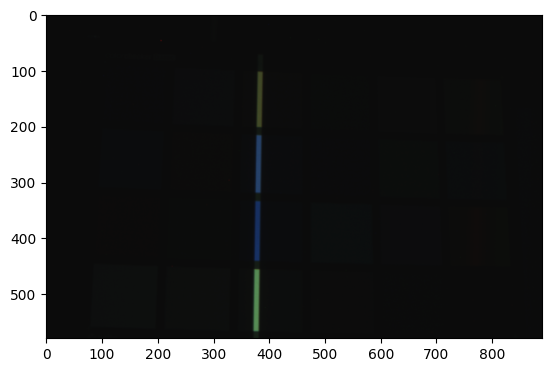

In [45]:
s = 10
plt.imshow(hdr_imgs[60]/hdr_imgs.max())

In [10]:
# hdr_imgs_crop = hdr_imgs[:,77:580+77,75:75+890]

In [52]:
hdr_imgs.shape

(128, 580, 890, 3)

In [12]:
hdr_imgs = hdr_imgs.transpose(1,2,0,3)

In [51]:
(hdr_imgs).max()

120678.45486111111

In [50]:
os.getcwd()

'c:\\Users\\owner\\Documents\\GitHub\\Scalable-Hyp-3D-Imaging\\calibration'

In [49]:
np.save('./hdr_step5', hdr_imgs)